NE 795 Advanced Topics in Nuclear Engineering Scientific Machine Learning
-
Homework 2: Fundamental Techniques of Machine Learning
-

Problem 2 - Logistic Regression
-

Libraries Import:

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# to omit some warnings if there are no predicted samples for a particular class
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


Iris dataset loading:

In [296]:
iris = datasets.load_iris()

Pandas dataframe creation for data storage and manipulation:

In [297]:
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

Data split into training and testing sets:

In [298]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Logistic regression model training:

In [299]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Predictions on the test set:

In [300]:
y_pred = model.predict(X_test)

The model evaluation:

In [301]:
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Confusion matrix visualization:

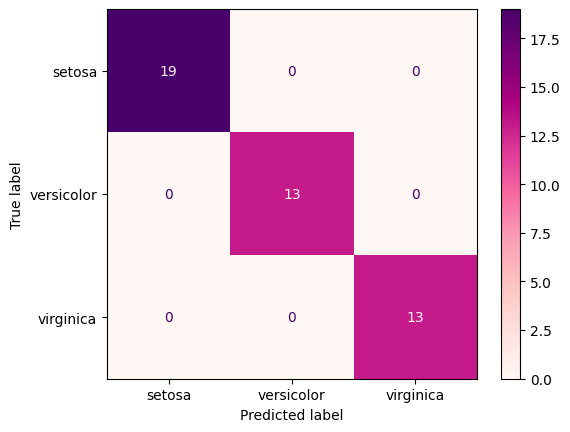

In [302]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names).plot(cmap=plt.cm.RdPu)
plt.show()

Pair plot visualization:

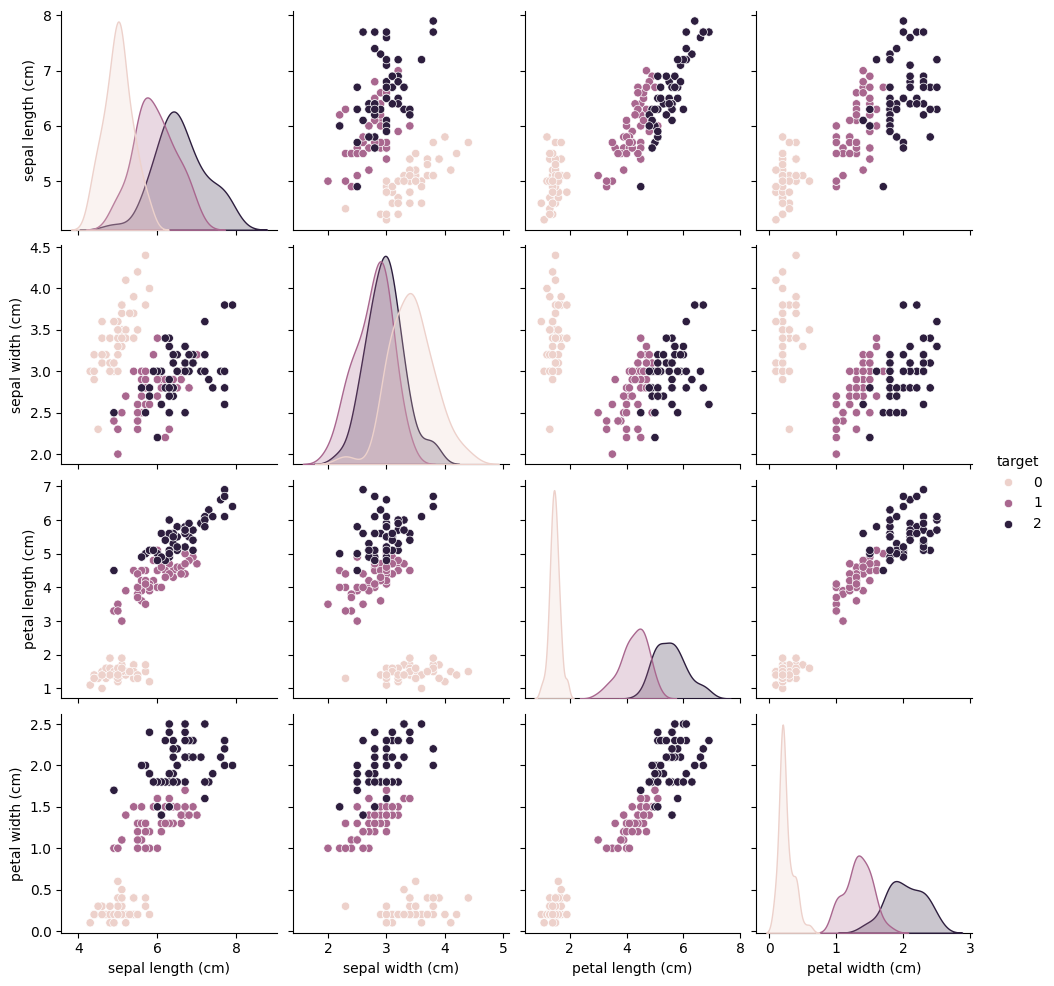

In [303]:
sns.pairplot(data, hue="target", diag_kind="kde")
plt.show()

Problem 3 - K-Nearest Neighbor
-

Import of K-Nearest Neighbor module:

In [304]:
from sklearn.neighbors import KNeighborsClassifier

Optimization of the k hyperparameter steps:

 - picking a range of k values;
 - training K-NN models with different k values;
 - models evaluation using accuracy (or other suitable metric);
 - determination of the k that provides the best performance.

k hyperparameter optimization:

In [305]:
k_values = range(1, 31)
accuracy_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    accuracy_scores.append(accuracy)

The accuracy vs. k values plot:

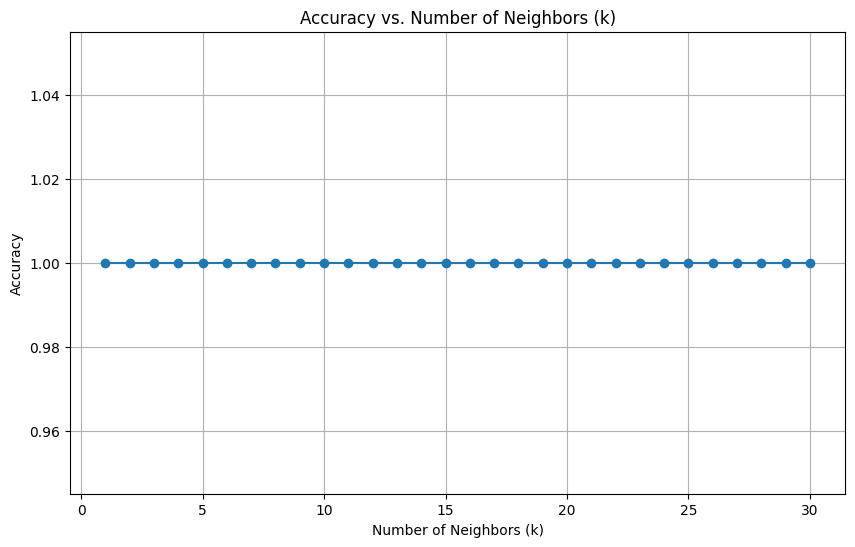

In [306]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

The K-Nearest Neighbors (K-NN) model is not sensitive to changes in the number of neighbors (k) in the selected range of k values (1 to 30). 
Possibly, this is due to simpicity of the dataset.

Choosing k value to train the K-NN model:

In [307]:
best_k = k_values[np.argmax(accuracy_scores)]
print(f"The best 'k' value: {best_k}")
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)

The best 'k' value: 1


KNeighborsClassifier(n_neighbors=1)

Predictions and the model evaluation:

In [308]:
y_pred = final_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Confusion matrix visualization:

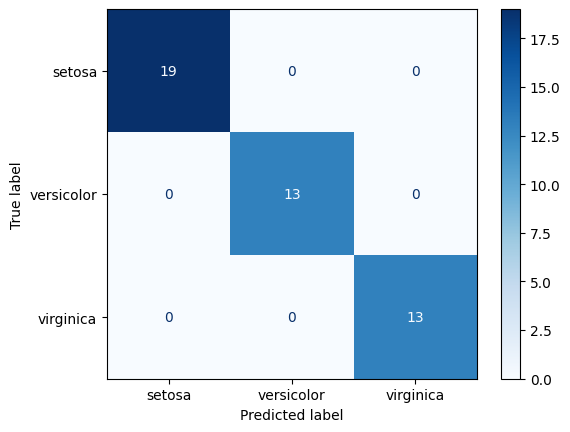

In [309]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names).plot(cmap=plt.cm.Blues)
plt.show()

Problem 4 - Navie Bayes
-

Import of Naive Bayes module:

In [310]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

Training of different Naive Bayes models with different event models - Gaussian, Multinomial, and Bernoulli:

In [311]:
models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))
    print()

Model: GaussianNB
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Model: MultinomialNB
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.92      0.92      0.92        13
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45


Model: BernoulliNB
              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        19
  versicolor       0.29      1.00      0.45        13
   virginica   

The most suitable event model that provides the best performance based on the classification report can be chosen by the accuracy, precision, recall, and F1-score.

The Gaussian Naive Bayes model is suitable for continuous features like the ones in the Iris dataset. Multinomial Naive Bayes and Bernoulli Naive Bayes are better suited for discrete data, such as text data or data with count-like properties.

Models accuracy estimation:

In [312]:
accuracies = {}

for model_name, model in models.items():
    accuracies[model_name] = accuracy

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print()

Model: GaussianNB
Accuracy: 1.0000

Model: MultinomialNB
Accuracy: 1.0000

Model: BernoulliNB
Accuracy: 1.0000



Confusion matrix visualization:

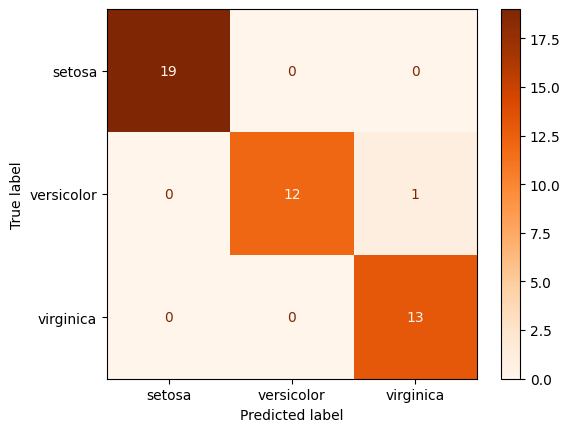

In [313]:
selected_model = GaussianNB()
selected_model.fit(X_train, y_train)
y_pred = selected_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names).plot(cmap=plt.cm.Oranges)
plt.show()

Problem 5 - Decision Tree
-

Import of Decision Tree module:

In [314]:
from sklearn.tree import DecisionTreeClassifier

Parameters variety of the Decision Tree classifier:

Parameters variety of the Decision Tree classifier:


 - "criterion": specifies the function used to measure the quality of a split. The two most common options are:
     - "gini": uses the Gini impurity as the measure of impurity.
     - "entropy": uses information gain based on entropy as the measure of impurity. Entropy tends to be more sensitive to changes in class probabilities and can lead to deeper trees with more balanced classes.
 - "max_depth": controls the maximum depth of the decision tree. A shallow tree has a lower risk of overfitting; a deeper tree can capture more complex patterns but might overfit.
 - "min_samples_split": sets the minimum number of samples required to split an internal node. 
 - "min_samples_leaf": defines the minimum number of samples required to be at a leaf node. A smaller value can make the tree more sensitive to noisy data.
 - "max_features": controls the number of features to consider when looking for the best split.
 - "splitter": determines the strategy used to choose the split at each node: "best" or "random".
 - "min_impurity_decrease": controls whether a split is performed based on a decrease in impurity. If the impurity decrease is below this value, the split is not performed.
 - "class_weight": addresses class imbalance. It can be set to "balanced" to automatically adjust the weights based on the number of samples in each class.
 - "presort": if set to "True," the decision tree will presort the data to speed up the training. This can be useful for small datasets, but it's generally not recommended for larger datasets.
 - "random_state": sets the random seed for reproducibility of results.
 - "min_weight_fraction_leaf": allows for setting a threshold for the sum of weights required to be at a leaf node.

These hyperparameters allow control over the Decision Tree's construction and can be used to fine-tune the model. The choice of hyperparameters depends on the dataset and the desirable trade-off between bias and variance.

To find the optimal hyperparameters, hyperparameter tuning should be performed, such as grid search or random search, to systematically evaluate different combinations of hyperparameters and choose those that result in the best model performance. Experimentation and cross-validation are often necessary to determine the most suitable hyperparameter settings.

The Decision Tree classifier training with different parameters:

In [315]:
parameters = [
    {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1}
]

for param_set in parameters:
    model = DecisionTreeClassifier(**param_set)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Parameters:", param_set)
    print(classification_report(y_test, y_pred, target_names=iris.target_names))
    print()

Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1}
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Parameters: {'criterion': 'entropy', 'm

Confusion matrix visualization:

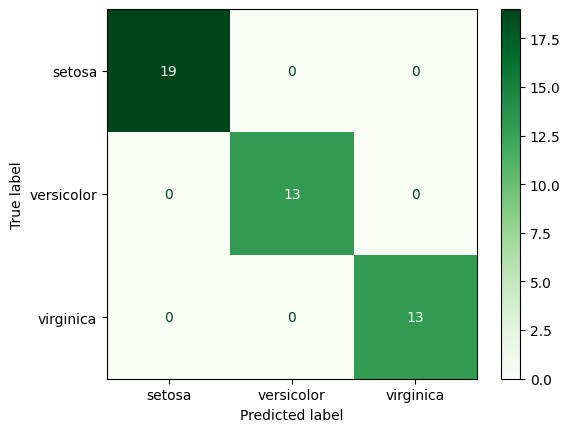

In [316]:
selected_parameters = {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1}
selected_model = DecisionTreeClassifier(**selected_parameters)
selected_model.fit(X_train, y_train)
y_pred = selected_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names).plot(cmap=plt.cm.Greens)
plt.show()

Problem 6 - Bagging with Random Forest, AdaBoost and Gradient Boosting
-

Import of Random Forest, AdaBoost and Gradient Boosting:

In [317]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

Ensemble models training with different settings:

In [318]:
# Random Forest
rf_models = [
    RandomForestClassifier(n_estimators=10, random_state=42),
    RandomForestClassifier(n_estimators=100, random_state=42),
]

# AdaBoost
adaboost_models = [
    AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=50, random_state=42),
    AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42),
]

# Gradient Boosting
gradientboost_models = [
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=42),
]

ensemble_models = {
    'Random Forest': rf_models,
    'AdaBoost': adaboost_models,
    'Gradient Boosting': gradientboost_models,
}

for ensemble_name, models in ensemble_models.items():
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print(f"Ensemble: {ensemble_name}")
        print(f"Model Settings: {model}")
        print(classification_report(y_test, y_pred, target_names=iris.target_names))
        print()

Ensemble: Random Forest
Model Settings: RandomForestClassifier(n_estimators=10, random_state=42)
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Ensemble: Random Forest
Model Settings: RandomForestClassifier(random_state=42)
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Ensemble: AdaBoost
Model Settings: AdaBoostClassifier(estim

Ensemble methods are designed to improve the performance of the base models. The improvement is not guaranteed. The performance of ensemble methods depends on the dataset, the problem, and the choice of hyperparameters. In some cases, a well-tuned single Decision Tree model might perform as well as, or even better than, an ensemble method.

To determine whether ensemble methods improve the base Decision Tree model, the performance metrics (e.g., accuracy, precision, recall, F1-score) of the ensemble methods should be compared with those of the base Decision Tree model.

Confusion matrix visualization:

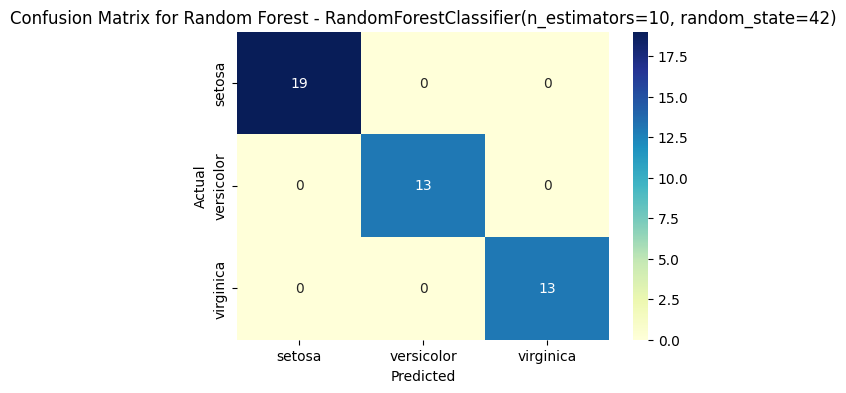

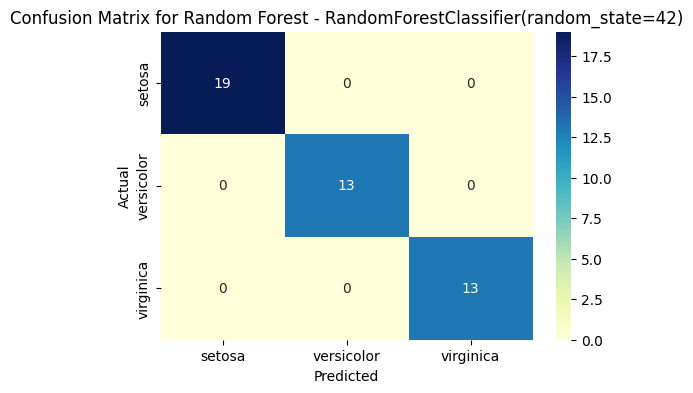

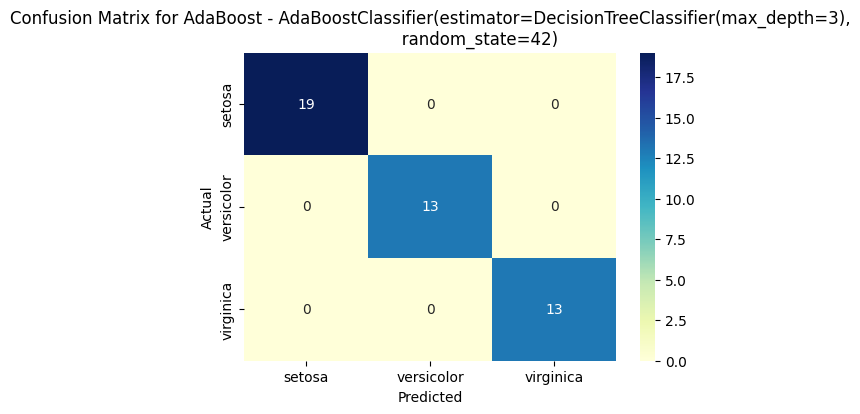

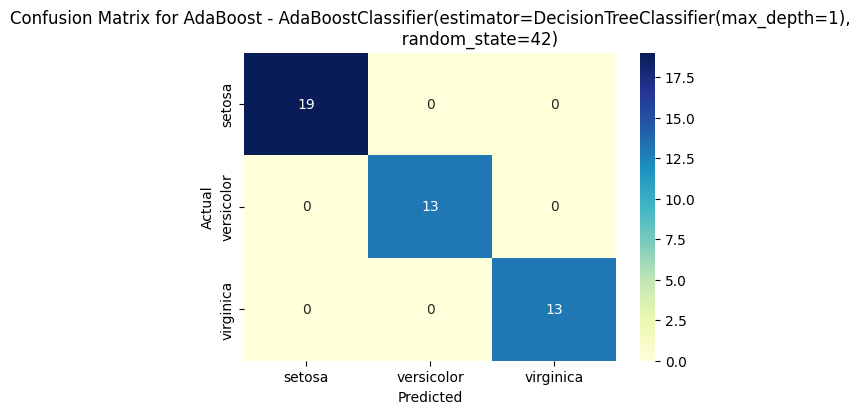

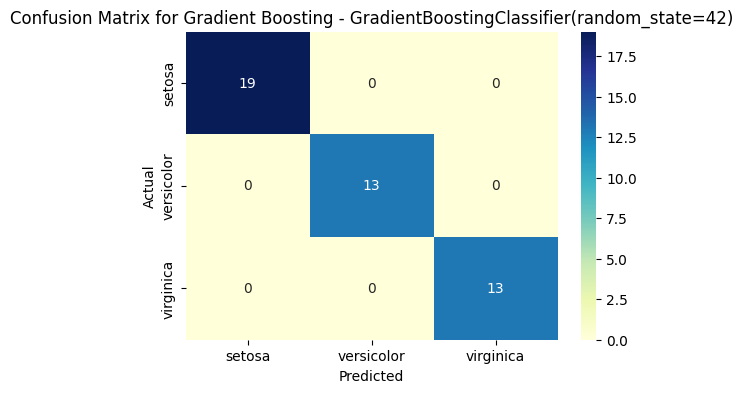

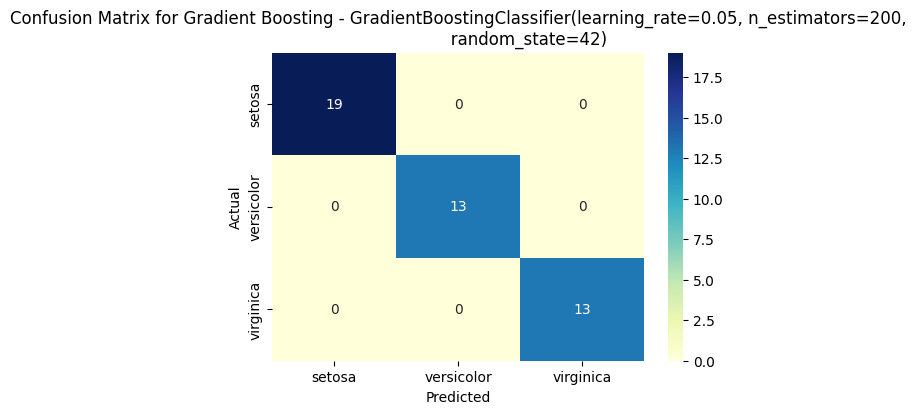

In [319]:
for ensemble_name, models in ensemble_models.items():
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=iris.target_names, yticklabels=iris.target_names)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix for {ensemble_name} - {model}')
        plt.show()

Models accuracy comparison plot:

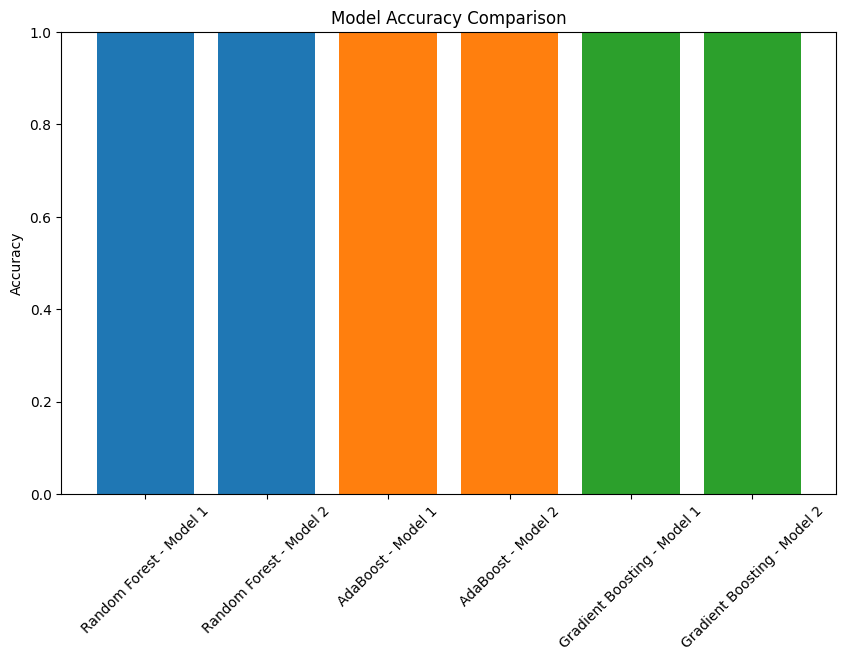

In [320]:
accuracy_scores = {}

for ensemble_name, models in ensemble_models.items():
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = model.score(X_test, y_test)
        
        if ensemble_name not in accuracy_scores:
            accuracy_scores[ensemble_name] = []

        accuracy_scores[ensemble_name].append(accuracy)

plt.figure(figsize=(10, 6))
for ensemble_name, accuracies in accuracy_scores.items():
    plt.bar([f'{ensemble_name} - Model {i+1}' for i in range(len(accuracies))], accuracies, label=ensemble_name)
    plt.xticks(rotation=45)

plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.show()


Problem 7 - Support Vector Machine
-

Import of Support Vector Machine model:

In [321]:
from sklearn.svm import SVC

Use only the first two features for visualization:

In [322]:
X = iris.data[:, :2] 
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

SVM models training with different kernels, gamma values, and penalty parameters:

In [323]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
gamma_values = [0.1, 1, 10]
C_values = [0.1, 1, 10]

for kernel in kernels:
    for gamma in gamma_values:
        for C in C_values:
            model = SVC(kernel=kernel, gamma=gamma, C=C)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            print(f"Kernel: {kernel}, Gamma: {gamma}, C: {C}")
            print(classification_report(y_test, y_pred, target_names=iris.target_names))

Kernel: linear, Gamma: 0.1, C: 0.1
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.73      0.62      0.67        13
   virginica       0.67      0.77      0.71        13

    accuracy                           0.82        45
   macro avg       0.80      0.79      0.79        45
weighted avg       0.82      0.82      0.82        45

Kernel: linear, Gamma: 0.1, C: 1
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.70      0.54      0.61        13
   virginica       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45

Kernel: linear, Gamma: 0.1, C: 10
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.70    

Decision boundaries of the SVM models with different kernels visualization:

Data Points: Each dot in the plot represents a data point from the Iris dataset. The color of the dots indicates the ground truth class of the data point.

Decision Regions: Each region corresponds to the area in the feature space where the SVM predicts a particular class.

Decision Boundary: The boundary lines between prediction from one class to another. The exact position and shape of these boundaries depend on the chosen kernel function, gamma, and penalty parameter (C).

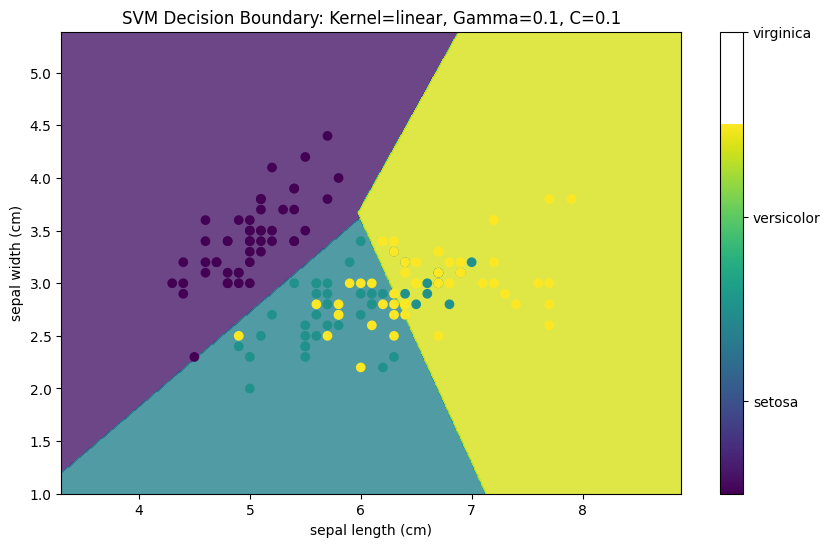

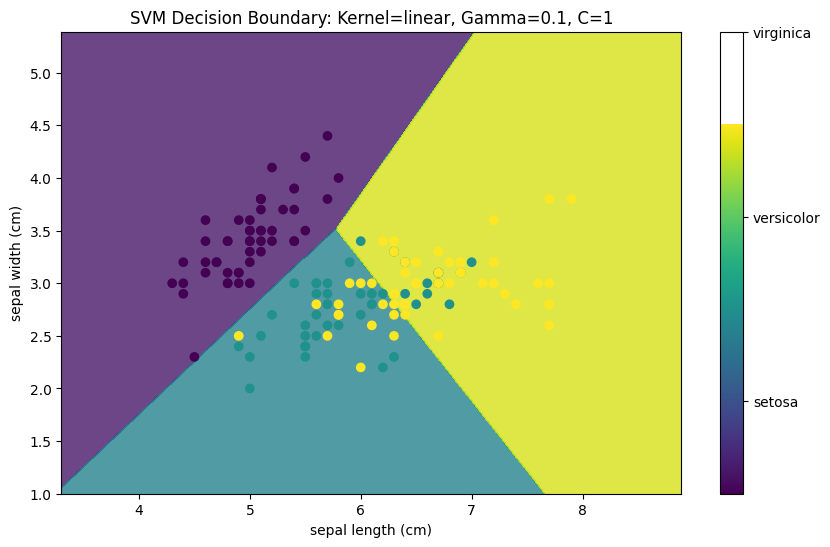

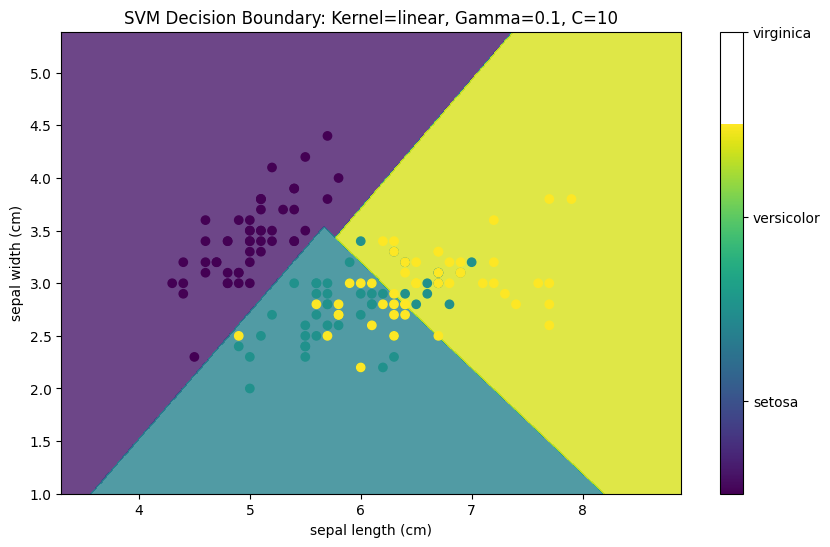

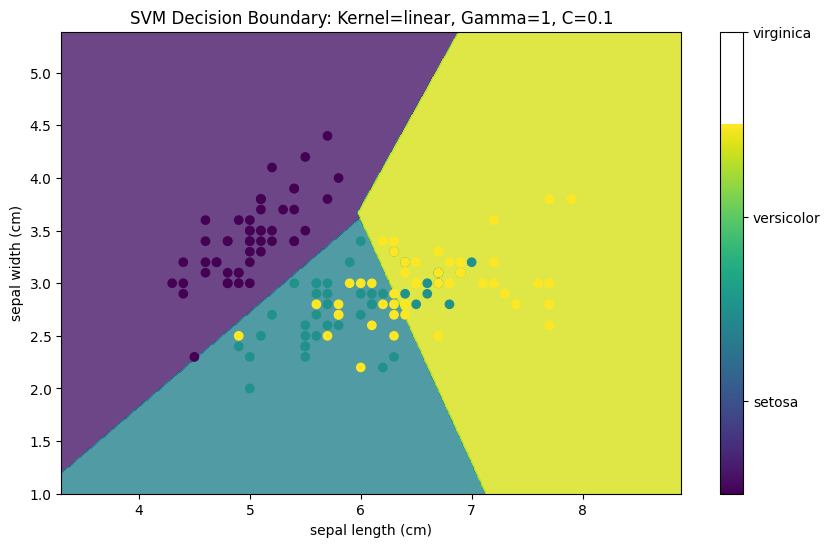

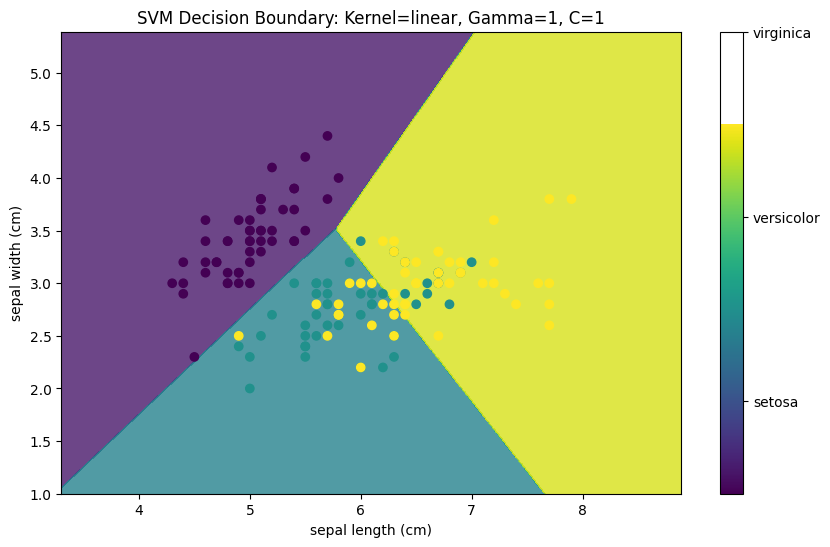

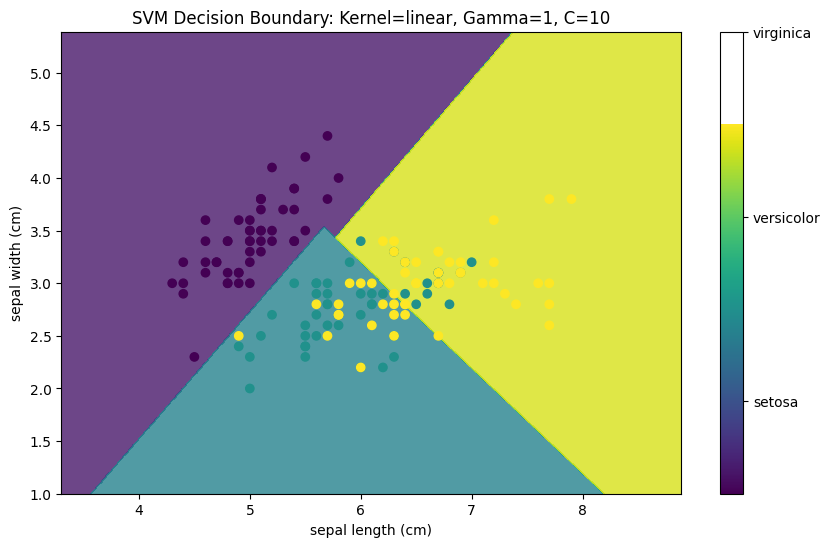

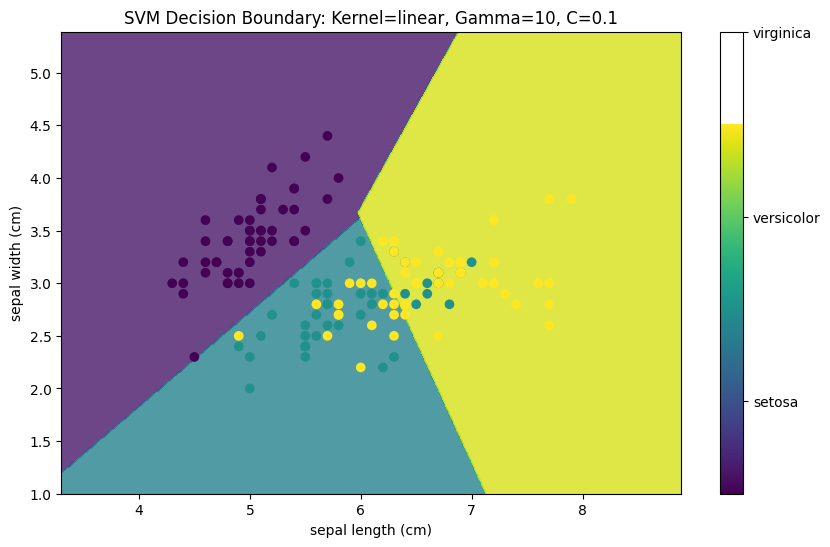

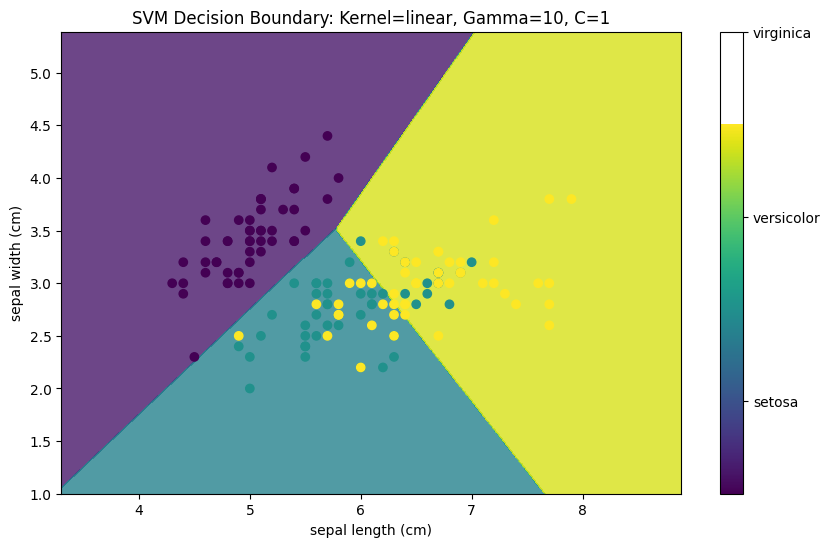

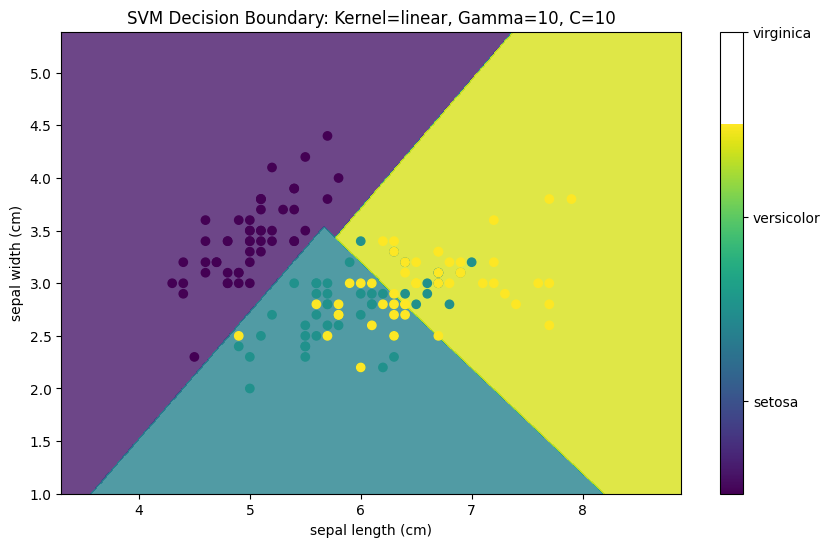

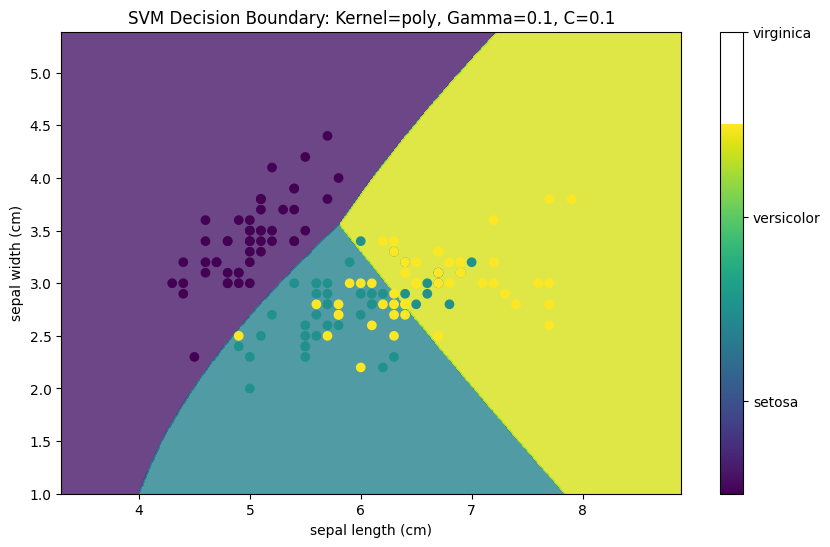

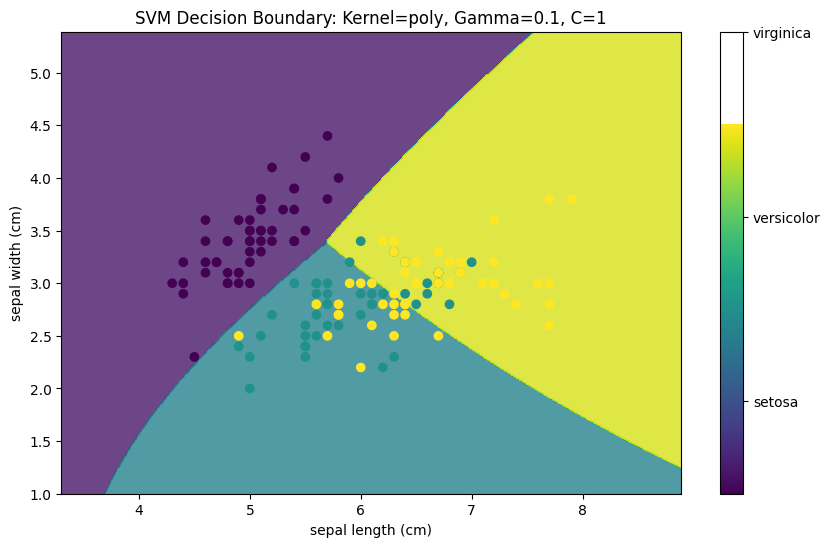

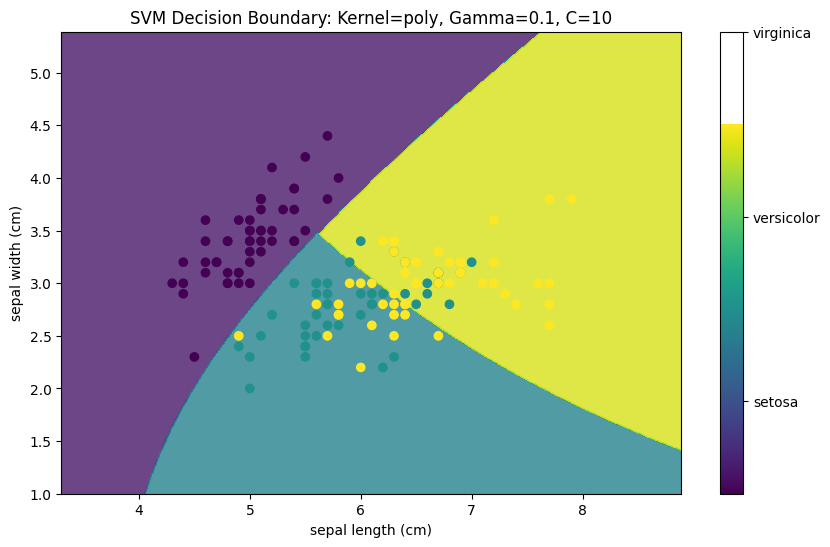

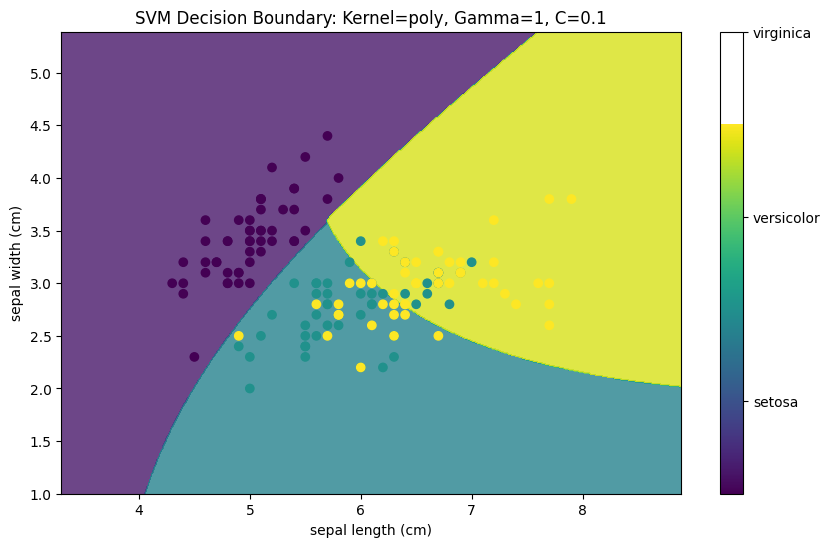

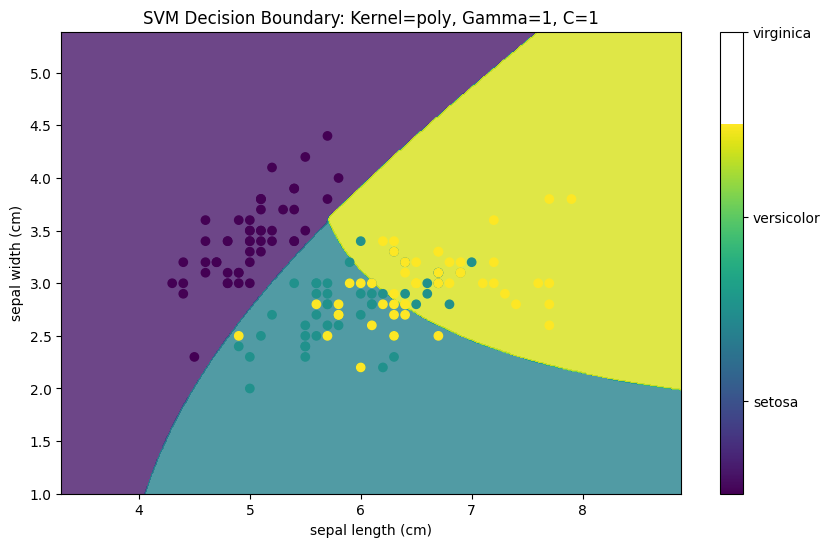

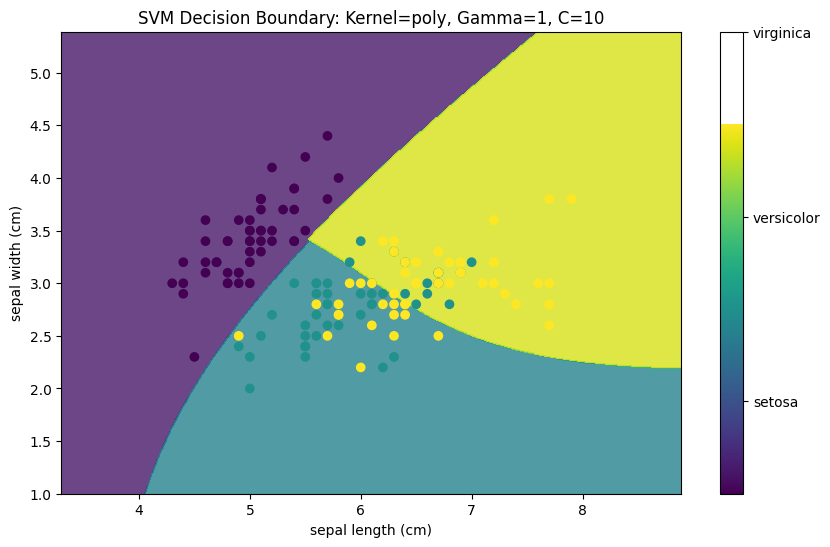

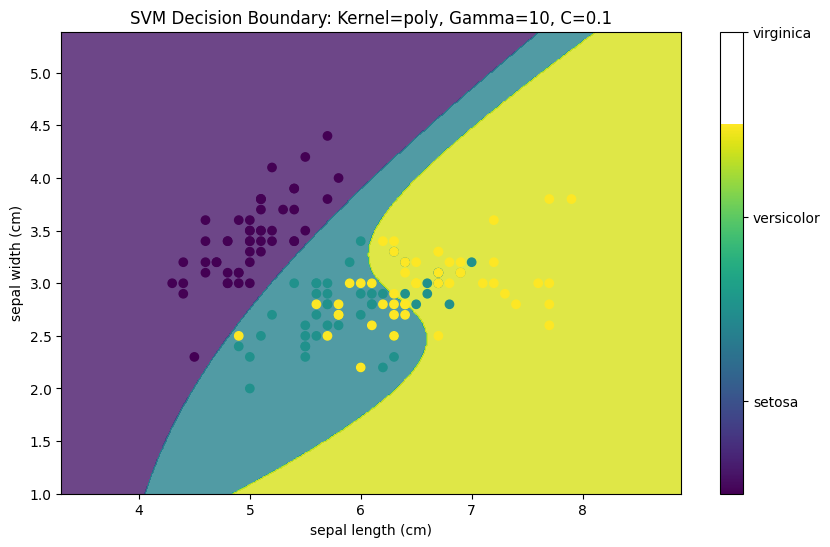

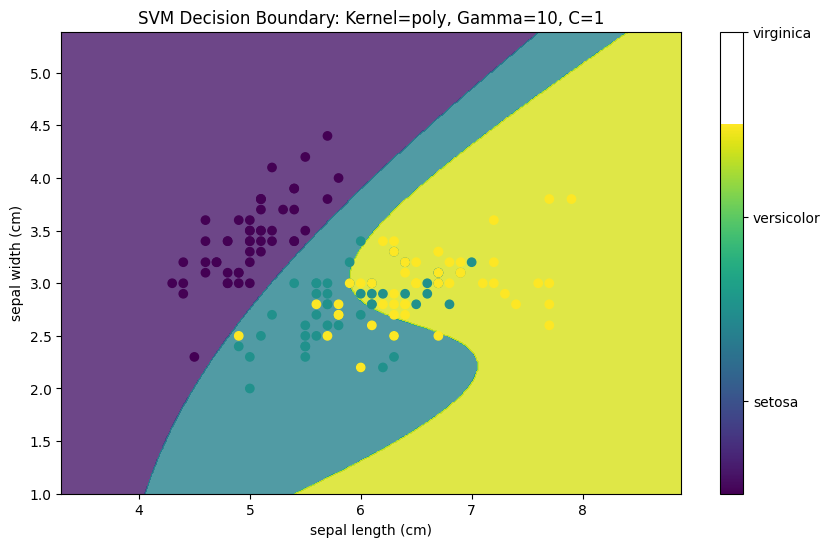

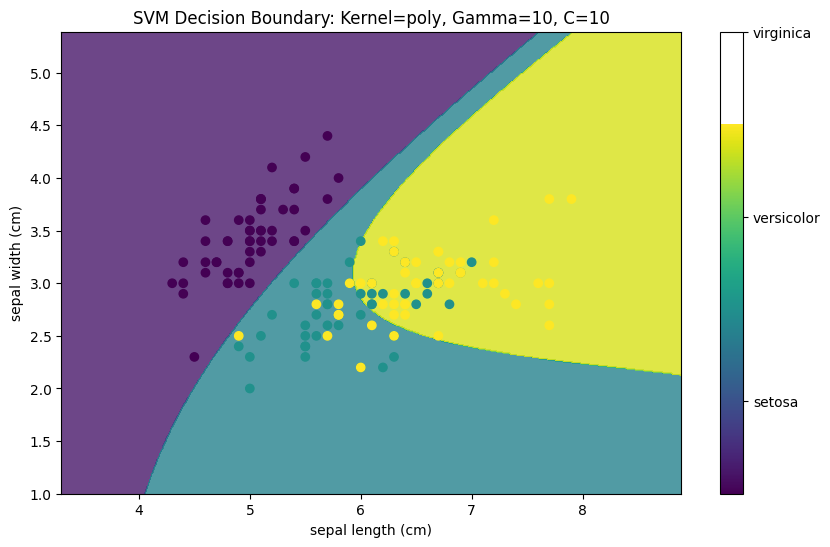

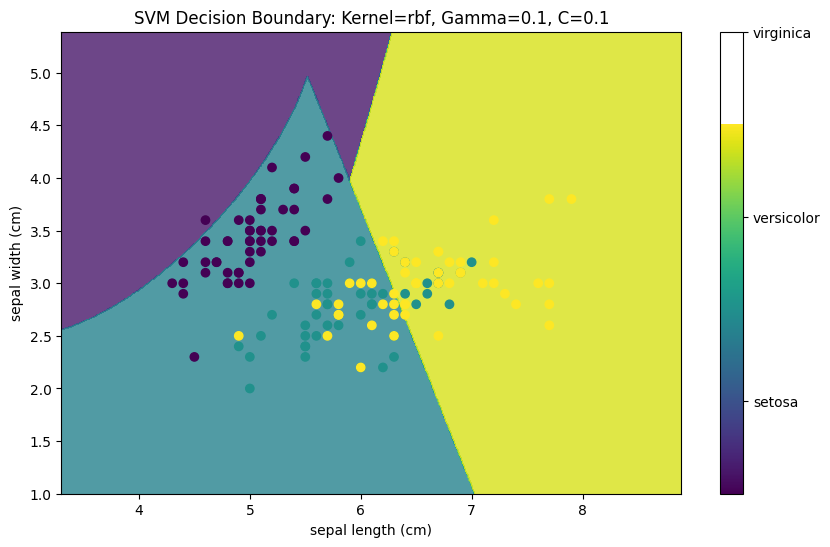

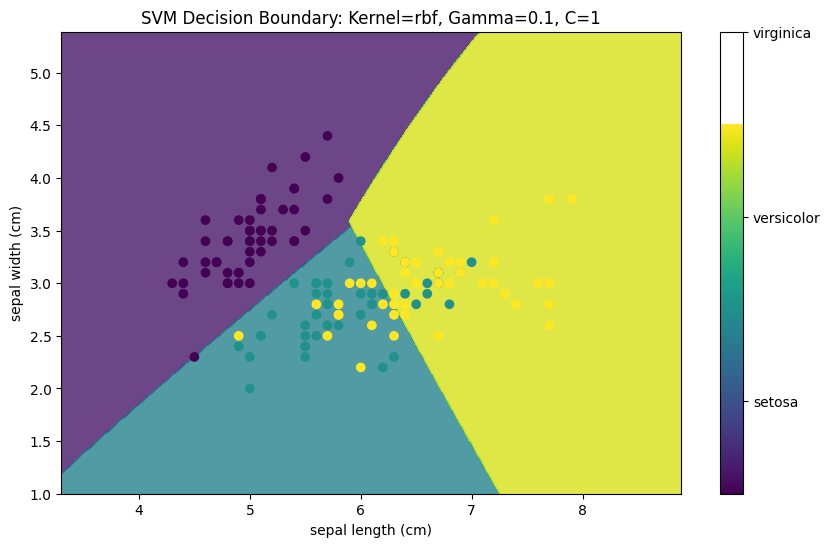

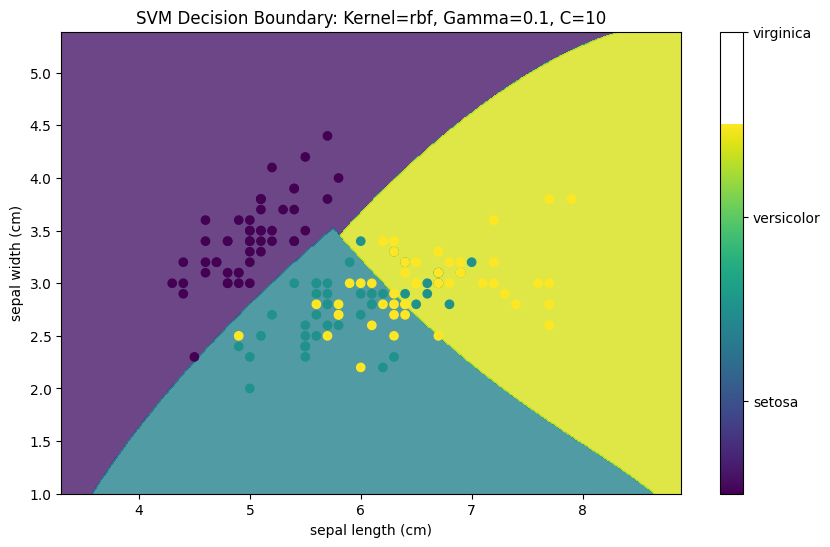

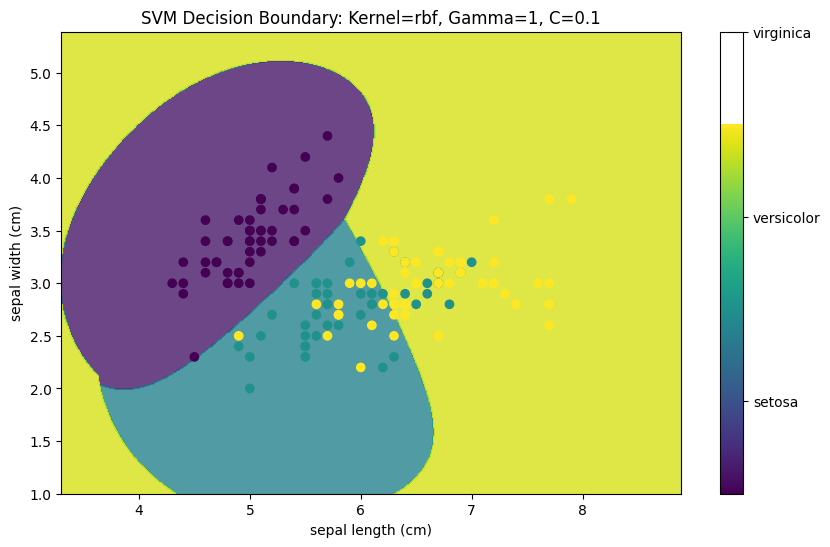

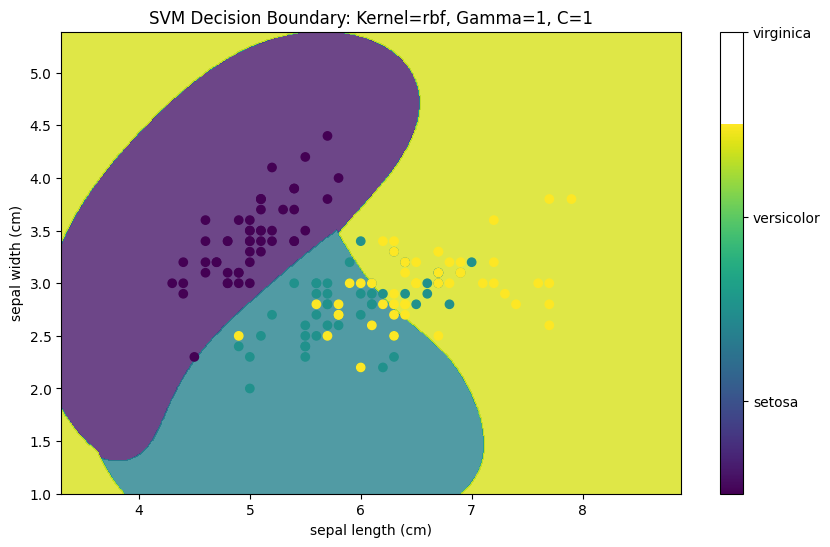

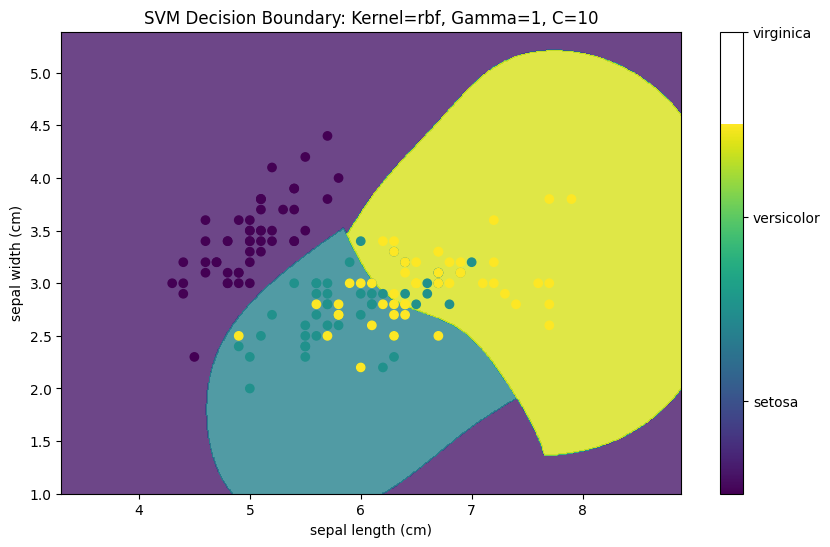

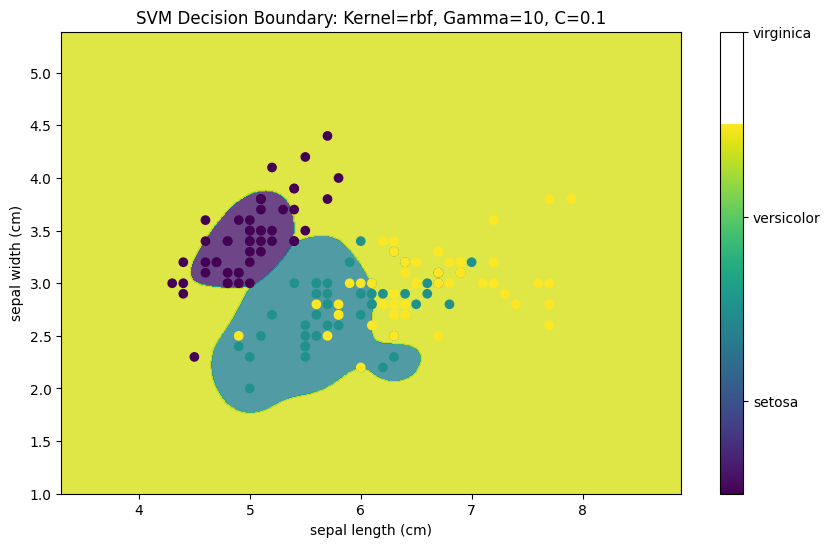

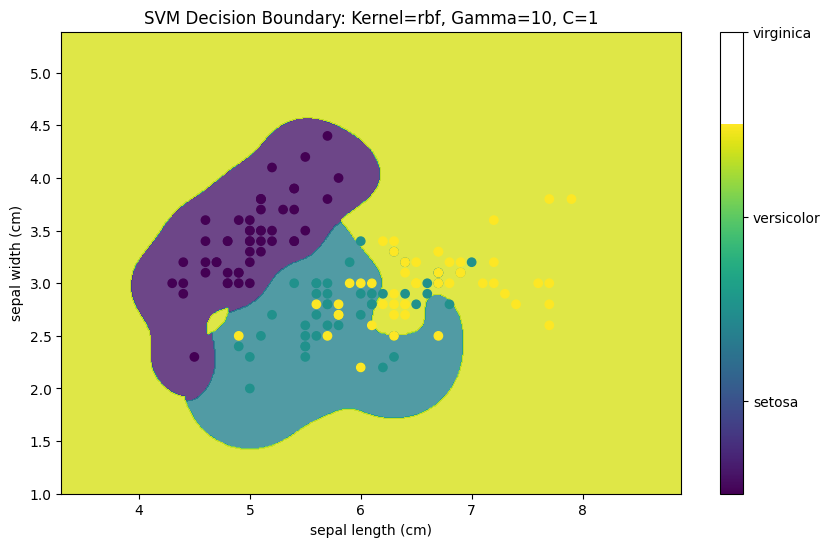

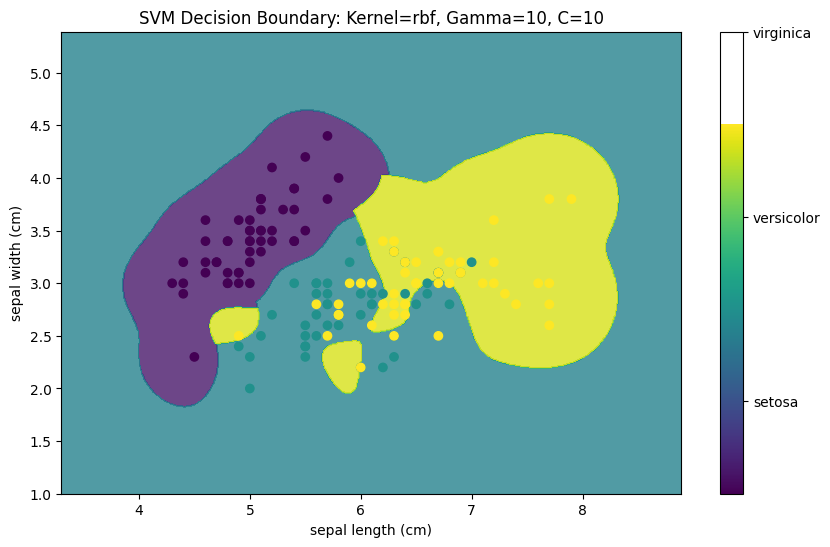

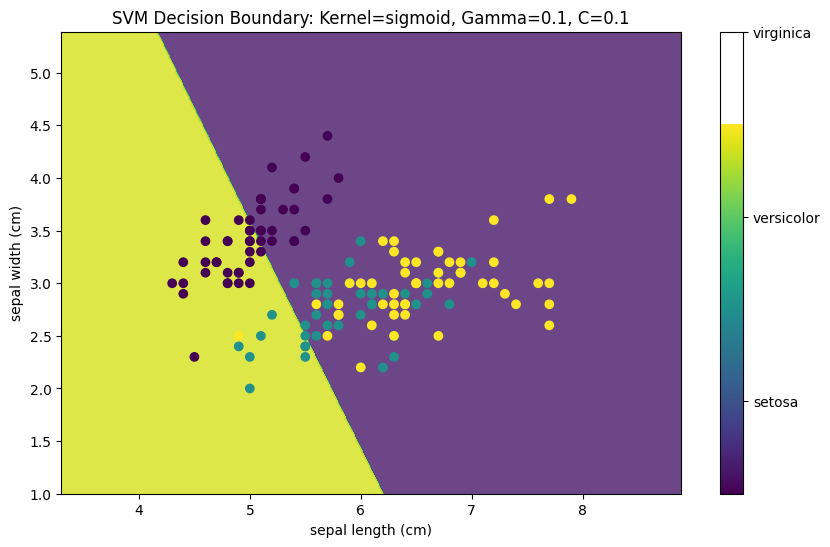

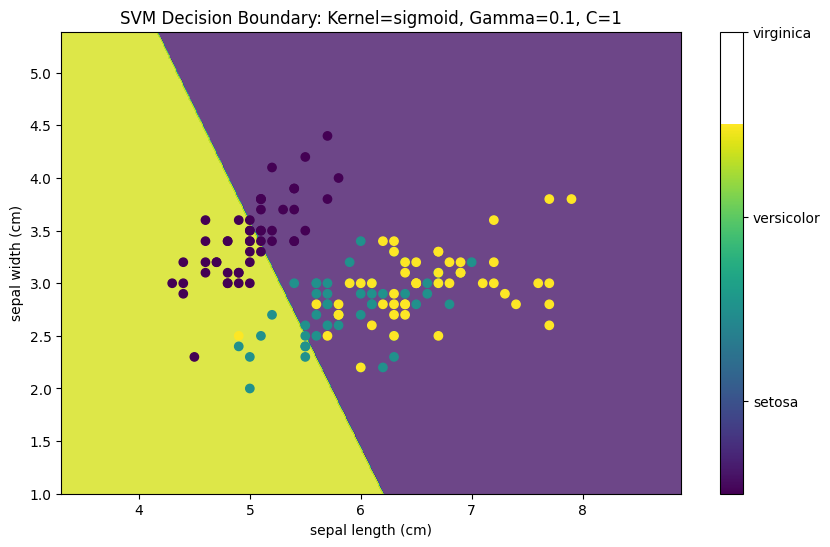

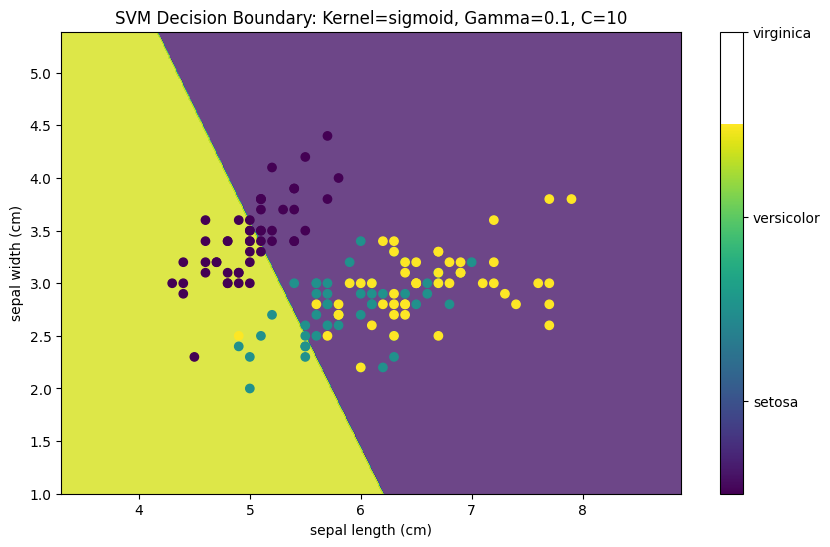

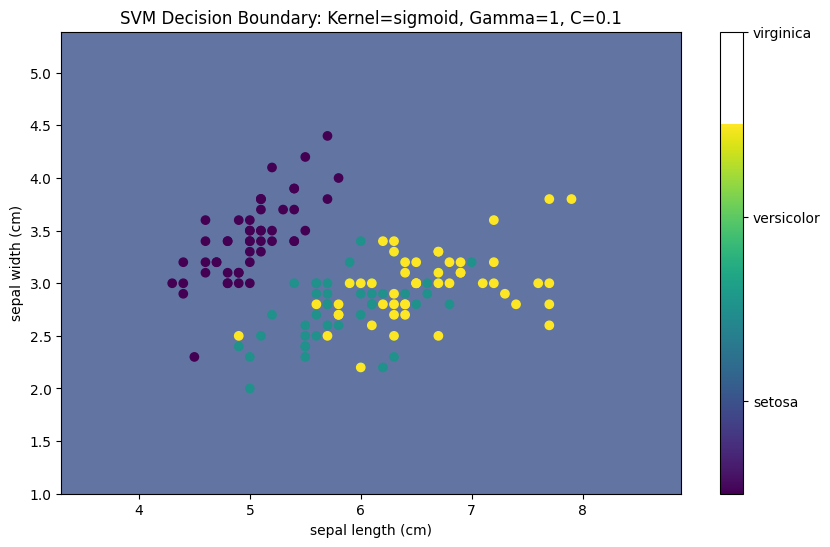

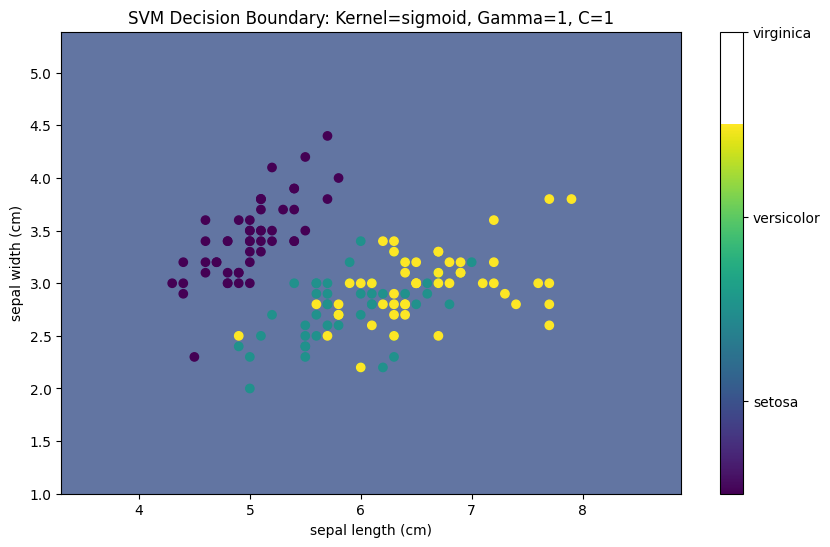

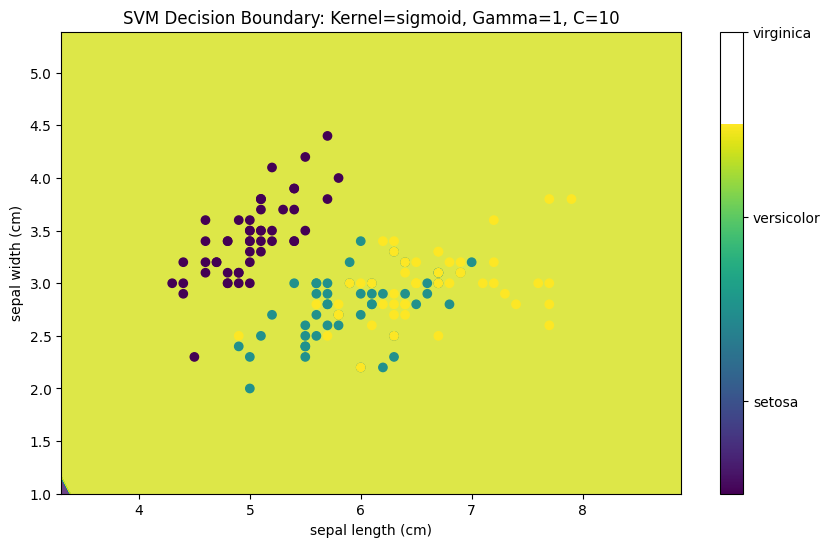

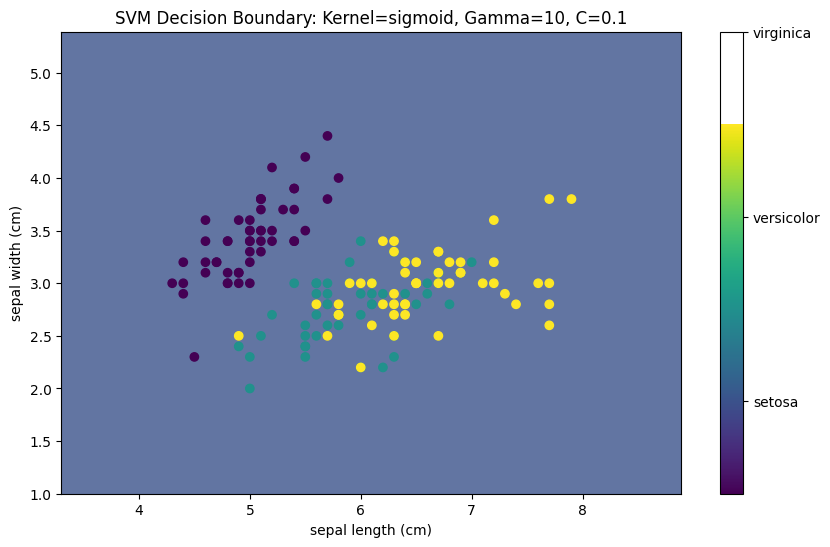

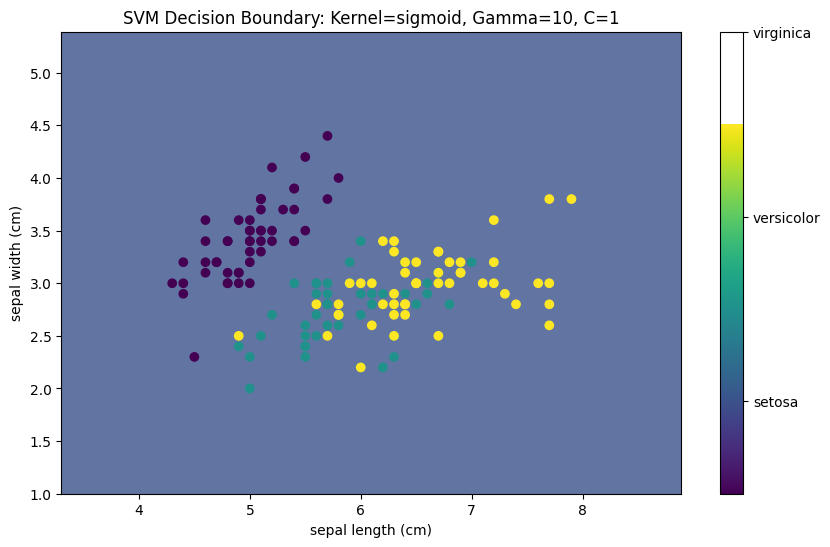

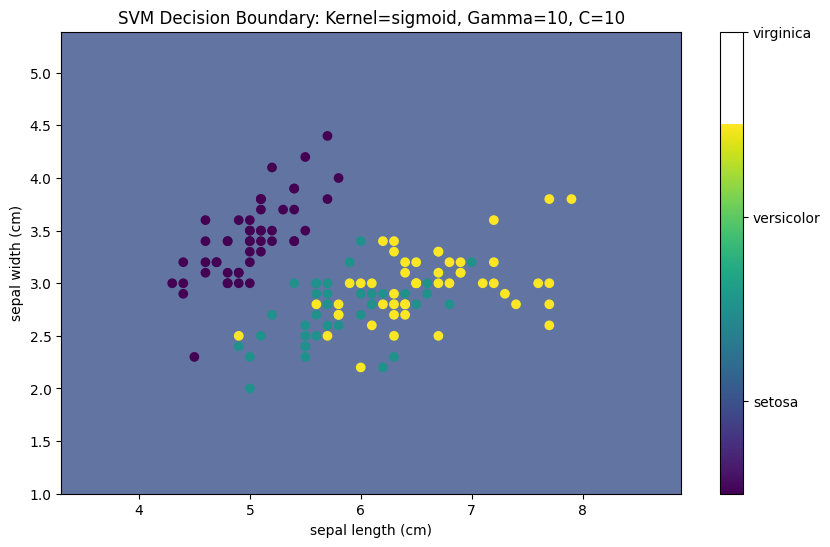

In [324]:
cmap = 'viridis'

h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

for kernel in kernels:
    for gamma in gamma_values:
        for C in C_values:
            model = SVC(kernel=kernel, gamma=gamma, C=C)
            model.fit(X_train, y_train)
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)

            plt.figure(figsize=(10, 6))
            plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.8)
            scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
            plt.xlabel(iris.feature_names[0])  
            plt.ylabel(iris.feature_names[1])  
            plt.title(f"SVM Decision Boundary: Kernel={kernel}, Gamma={gamma}, C={C}")

            color_bar = plt.colorbar(scatter)
            color_bar.set_ticks(np.arange(3) + 0.5)
            color_bar.set_ticklabels(iris.target_names)
            
            plt.show()